In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [3]:
df = pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv')

In [5]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       92 non-null     float64
 1   iq         96 non-null     float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df['cgpa'].replace(np.nan,df['cgpa'].mean(),inplace=True)

In [8]:
df['iq'].replace(np.nan,df['iq'].mean(),inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


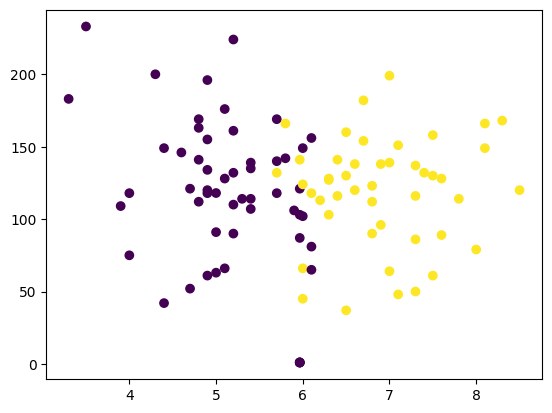

In [11]:
plt.scatter(df.cgpa,df.iq,c=df.placement)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
xtrain, xtest, ytrain, ytest=train_test_split(df[['cgpa','iq']],df['placement'],test_size=0.1,random_state=34)


In [15]:
from sklearn.preprocessing import StandardScaler


In [17]:
scaler = StandardScaler()

In [18]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [19]:
lgr = linear_model.LogisticRegression() 

In [20]:
lgr.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
lgr.score(xtest,ytest)
ypred = lgr.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(ytest,ypred)

0.9

In [26]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

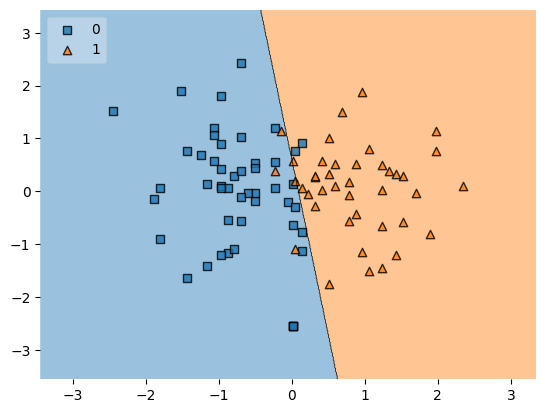

In [27]:
plot_decision_regions(xtrain,ytrain.values,clf=lgr,legend=2)

In [28]:
import pickle 

In [29]:
pickle.dump(lgr,open("lgr.pkl","wb"))

In [30]:
model = pickle.load(open("lgr.pkl","rb"))

In [32]:
CGPA = float(input("Enter Your CGPA: "))
IQ = int(input("Enter Your IQ level : "))

if model.predict([[CGPA,IQ]]) == 1:
    printf("Ho gya guru")

Enter Your CGPA:  7
Enter Your IQ level :  78


array([1])